### **Loading Libraries**

In [ ]:
if(!require(quantmod)) install.packages("quantmod")
if(!require(forecast)) install.packages("forecast")
if(!require(xlsx)) install.packages("xlsx")
if(!require(timeSeries)) install.packages("timeSeries")
if(!require(dplyr)) install.packages("dplyr")
if(!require(tsfknn)) install.packages("tsfknn")
library(tidyverse)
library(quantmod)
library(forecast)
library("xlsx")
library(timeSeries)
library(dplyr)
library(tsfknn)
library(ggplot2 )

Loading required package: quantmod

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘quantmod’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Loading required package: forecast

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘forecast’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘quadprog’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’


Loading required package: xlsx

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘xlsx’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rJa

ERROR: Error in library("xlsx"): there is no package called ‘xlsx’


### **Getting Stock Data**

In [ ]:
gsachs <- getSymbols("GS", src = "yahoo", from = "2016-01-01", to = as.character(Sys.Date()), auto.assign = FALSE)
dim(gsachs)
summary(gsachs)
tail(gsachs)

[1] 2470    6

     Index               GS.Open         GS.High          GS.Low     
 Min.   :2016-01-04   Min.   :136.0   Min.   :141.2   Min.   :130.9  
 1st Qu.:2018-06-15   1st Qu.:213.0   1st Qu.:215.2   1st Qu.:210.3  
 Median :2020-11-26   Median :263.6   Median :266.7   Median :260.5  
 Mean   :2020-11-28   Mean   :314.3   Mean   :317.7   Mean   :310.9  
 3rd Qu.:2023-05-11   3rd Qu.:375.4   3rd Qu.:378.8   3rd Qu.:371.3  
 Max.   :2025-10-28   Max.   :809.5   Max.   :825.2   Max.   :802.0  
    GS.Close       GS.Volume         GS.Adjusted   
 Min.   :135.0   Min.   :  460100   Min.   :115.2  
 1st Qu.:212.3   1st Qu.: 1957425   1st Qu.:183.1  
 Median :263.3   Median : 2544350   Median :224.8  
 Mean   :314.4   Mean   : 2891941   Mean   :288.5  
 3rd Qu.:374.5   3rd Qu.: 3340150   3rd Qu.:342.0  
 Max.   :806.3   Max.   :15194200   Max.   :806.3  

           GS.Open GS.High GS.Low GS.Close GS.Volume GS.Adjusted
2025-10-21  759.00  765.30 758.27   758.98   1782200      758.98
2025-10-22  760.61  760.61 743.11   744.60   2141400      744.60
2025-10-23  749.34  755.00 744.66   750.78   1615400      750.78
2025-10-24  759.85  784.61 756.00   783.88   2505600      783.88
2025-10-27  789.00  796.71 787.01   789.99   1645300      789.99
2025-10-28  792.05  798.36 787.35   792.09   1241400      792.09

###**Stock Return Behaviour using logarithm properties to calculate the log-return of the stock**

Don't know how to automatically pick scale for object of type <xts/zoo>.
Defaulting to continuous.


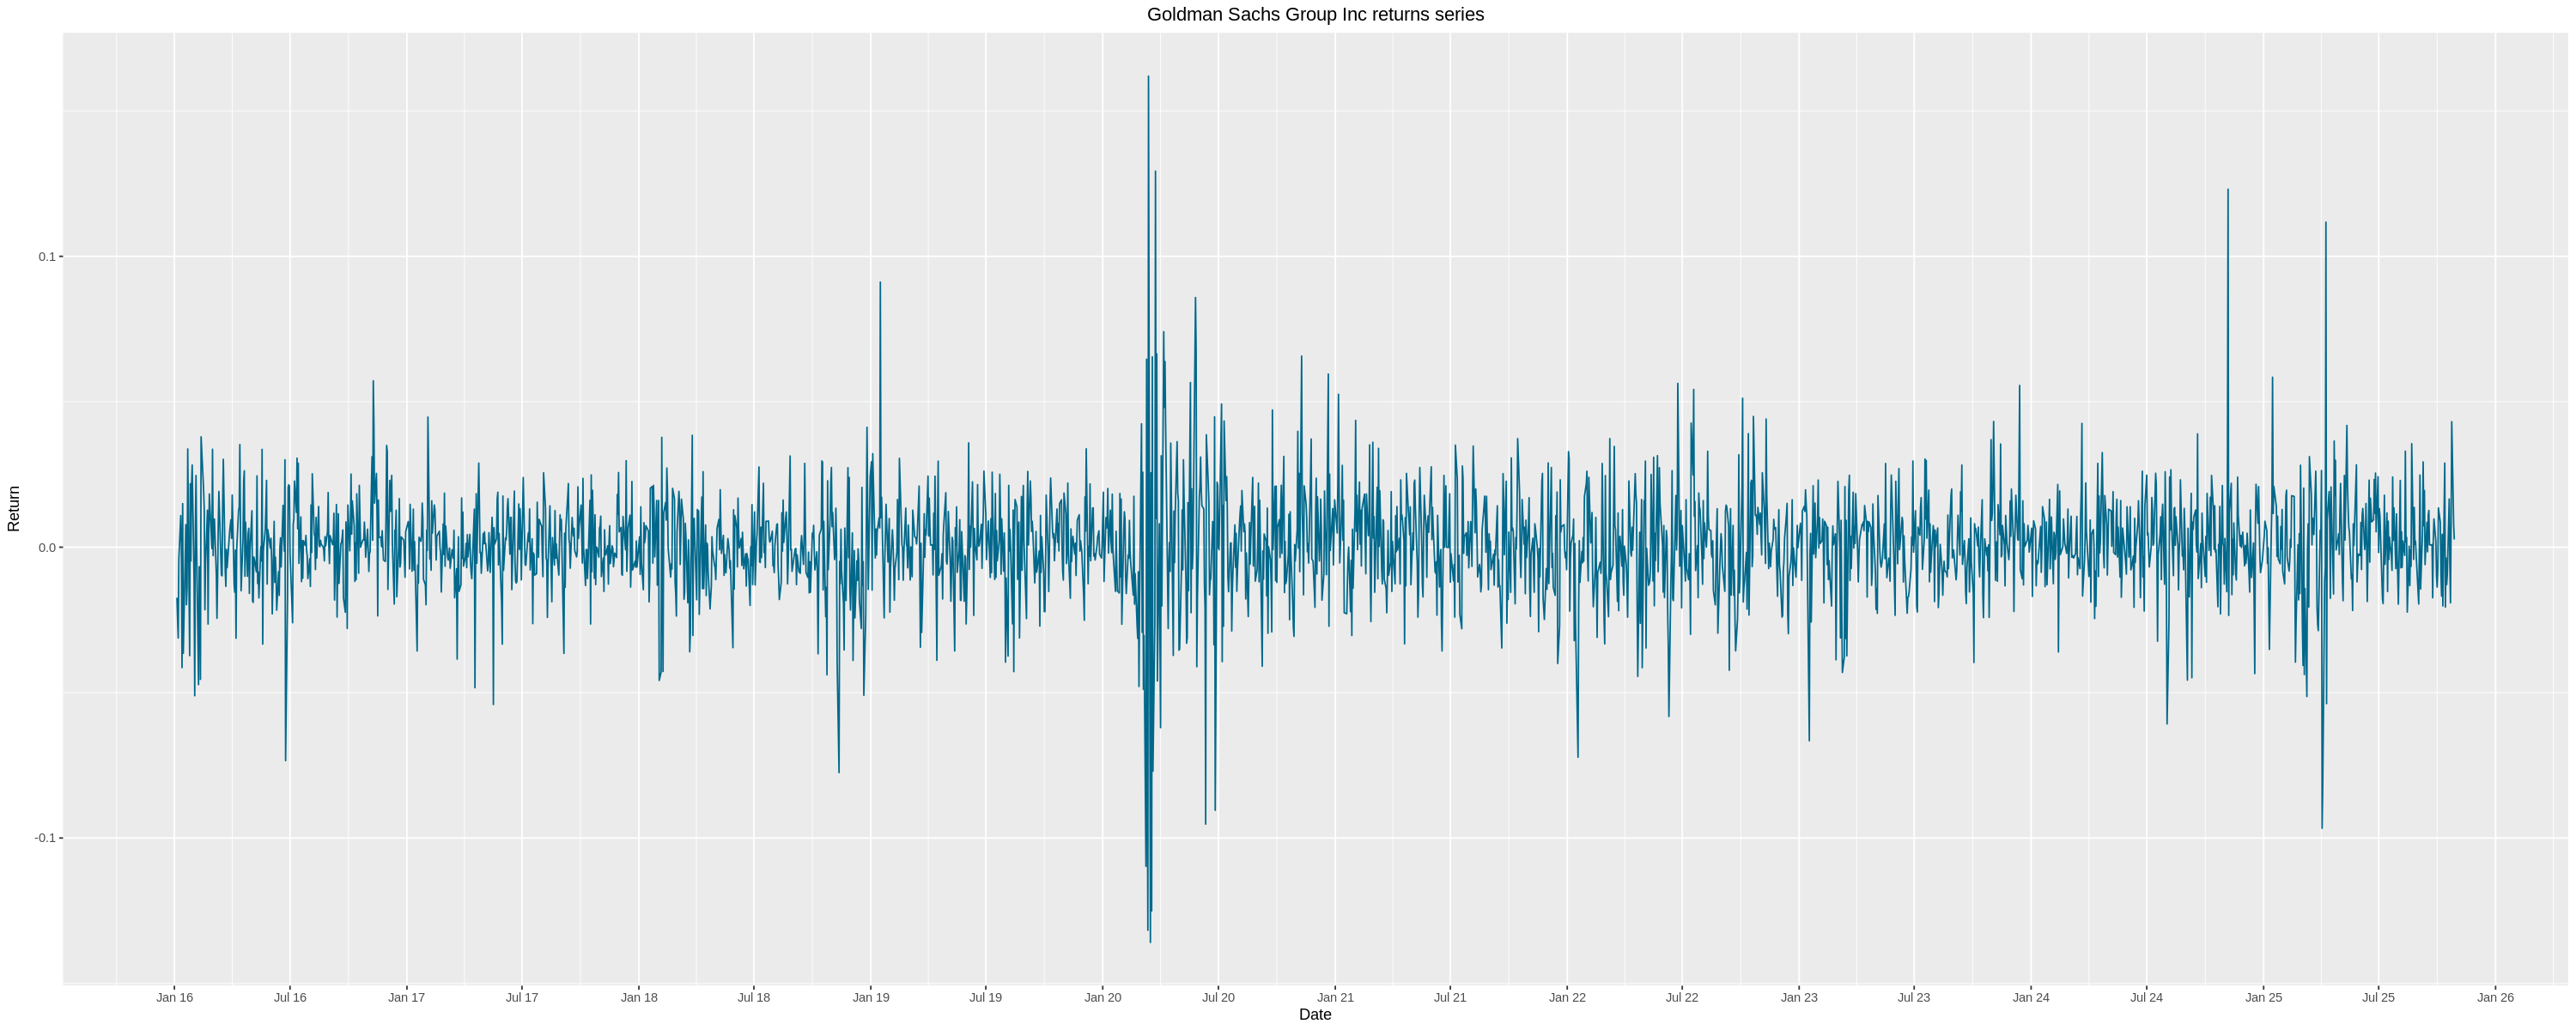

In [ ]:
gsachs_ret <- diff(log(gsachs[,6]))
gsachs_ret <- gsachs_ret[-1,]
options(repr.plot.width = 25, repr.plot.height = 10)
ggplot(gsachs_ret, aes(x = index(gsachs_ret), y = gsachs_ret)) +
  geom_line(color = "deepskyblue4") +
  ggtitle("Goldman Sachs Group Inc returns series") +
  xlab("Date") + ylab("Return") +
  theme(plot.title = element_text(hjust = 0.5)) + scale_x_date(date_labels = "%b %y", date_breaks = "6 months")

### **Forecasting Using ARIMA Model**

Series: Cl(gsachs) 
ARIMA(0,1,3) with drift 
Box Cox transformation: lambda= 0.3439456 

Coefficients:
          ma1     ma2      ma3   drift
      -0.0161  0.0569  -0.0309  0.0047
s.e.   0.0201  0.0205   0.0201  0.0026

sigma^2 = 0.0168:  log likelihood = 1543.62
AIC=-3077.24   AICc=-3077.21   BIC=-3048.18

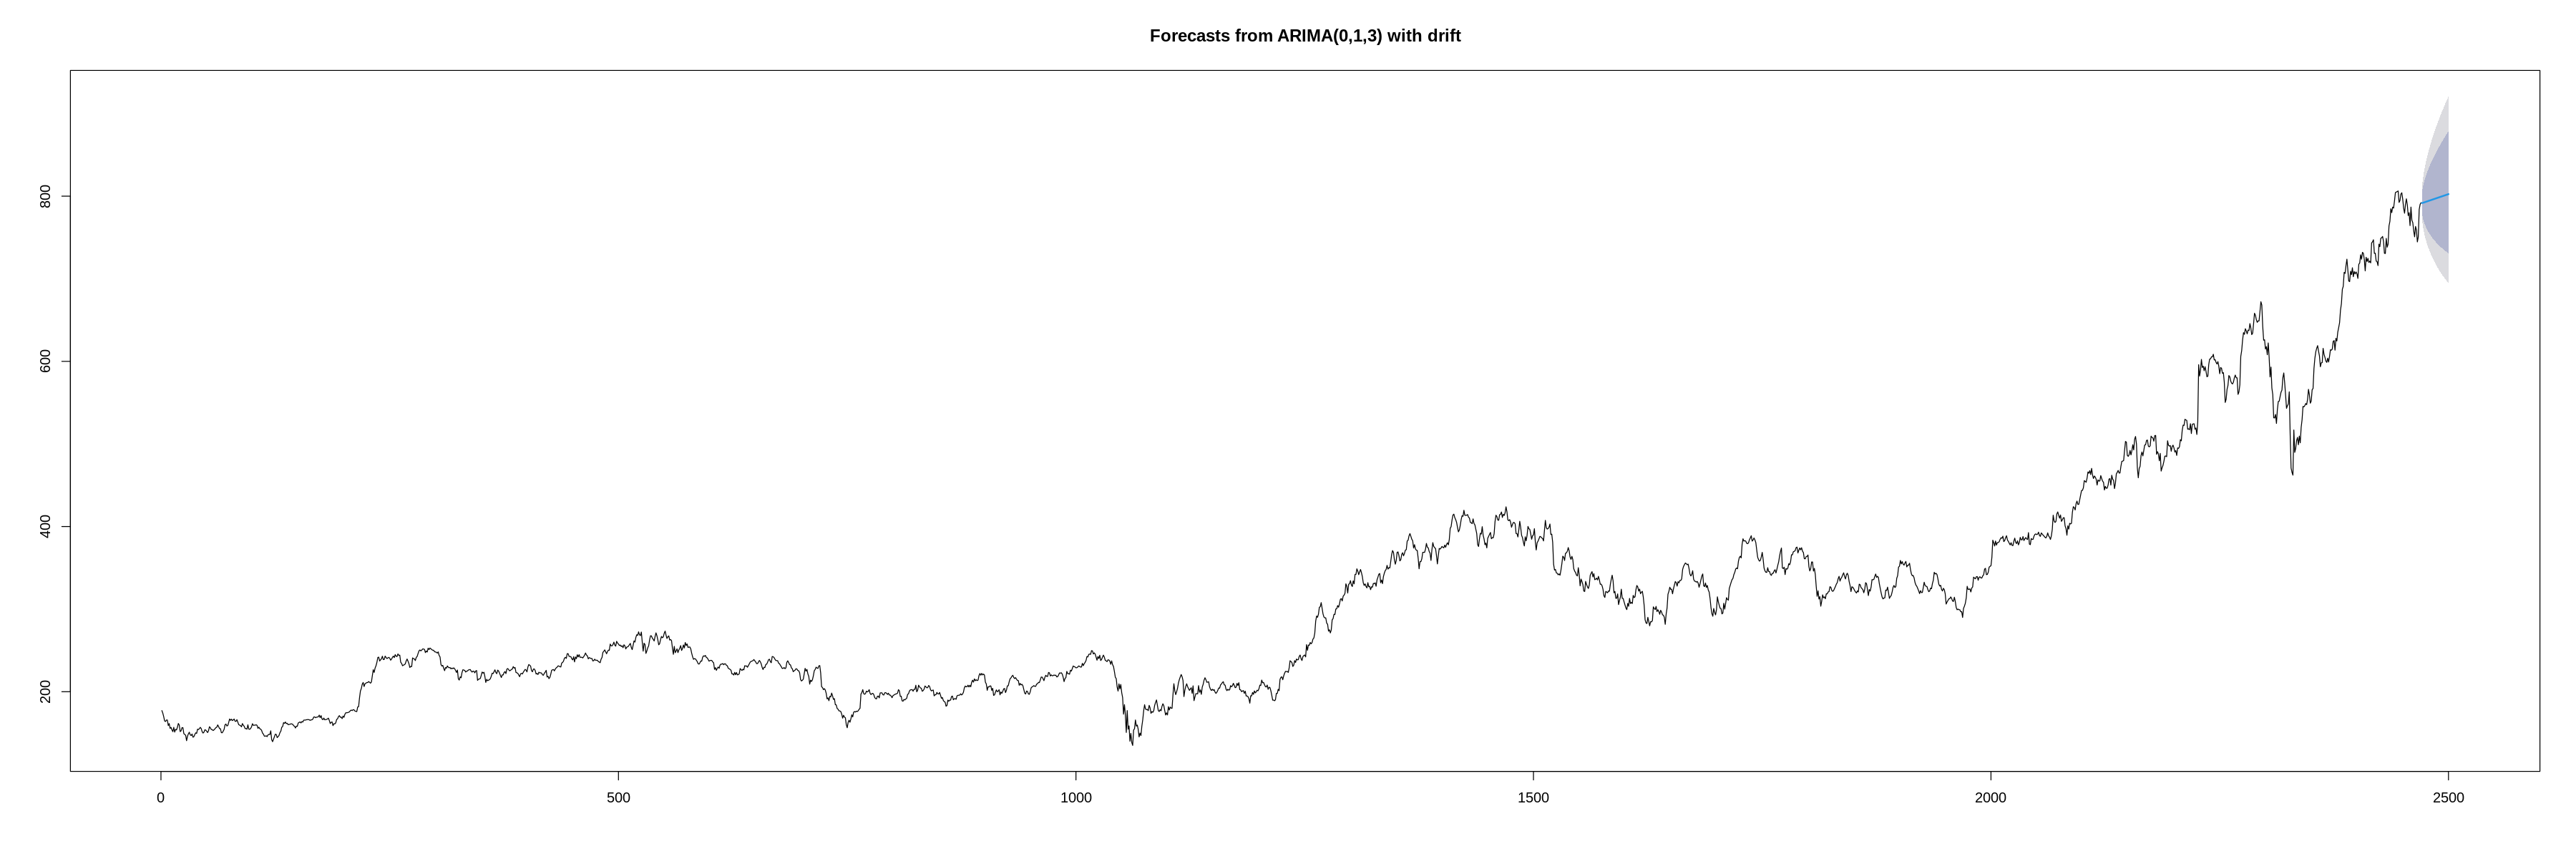

In [ ]:
modelfit <- auto.arima(Cl(gsachs), lambda = "auto")
modelfit
price_forecast <- forecast(modelfit, h=30)
options(repr.plot.width = 30, repr.plot.height = 10)
plot(price_forecast) # Blue Line = represents the mean of prediction

### **Forecasting using Feed Foward Neural network**

In [ ]:
alpha <- 1.5^(-10)
hn <- length(Cl(gsachs))/(alpha*(length(Cl(gsachs))+30)) # calculating number of hidden nodes

In [ ]:
lambda <- BoxCox.lambda(Cl(gsachs))
dnn_pred <- nnetar(Cl(gsachs), size= hn, lambda = lambda) # Single layer dnn

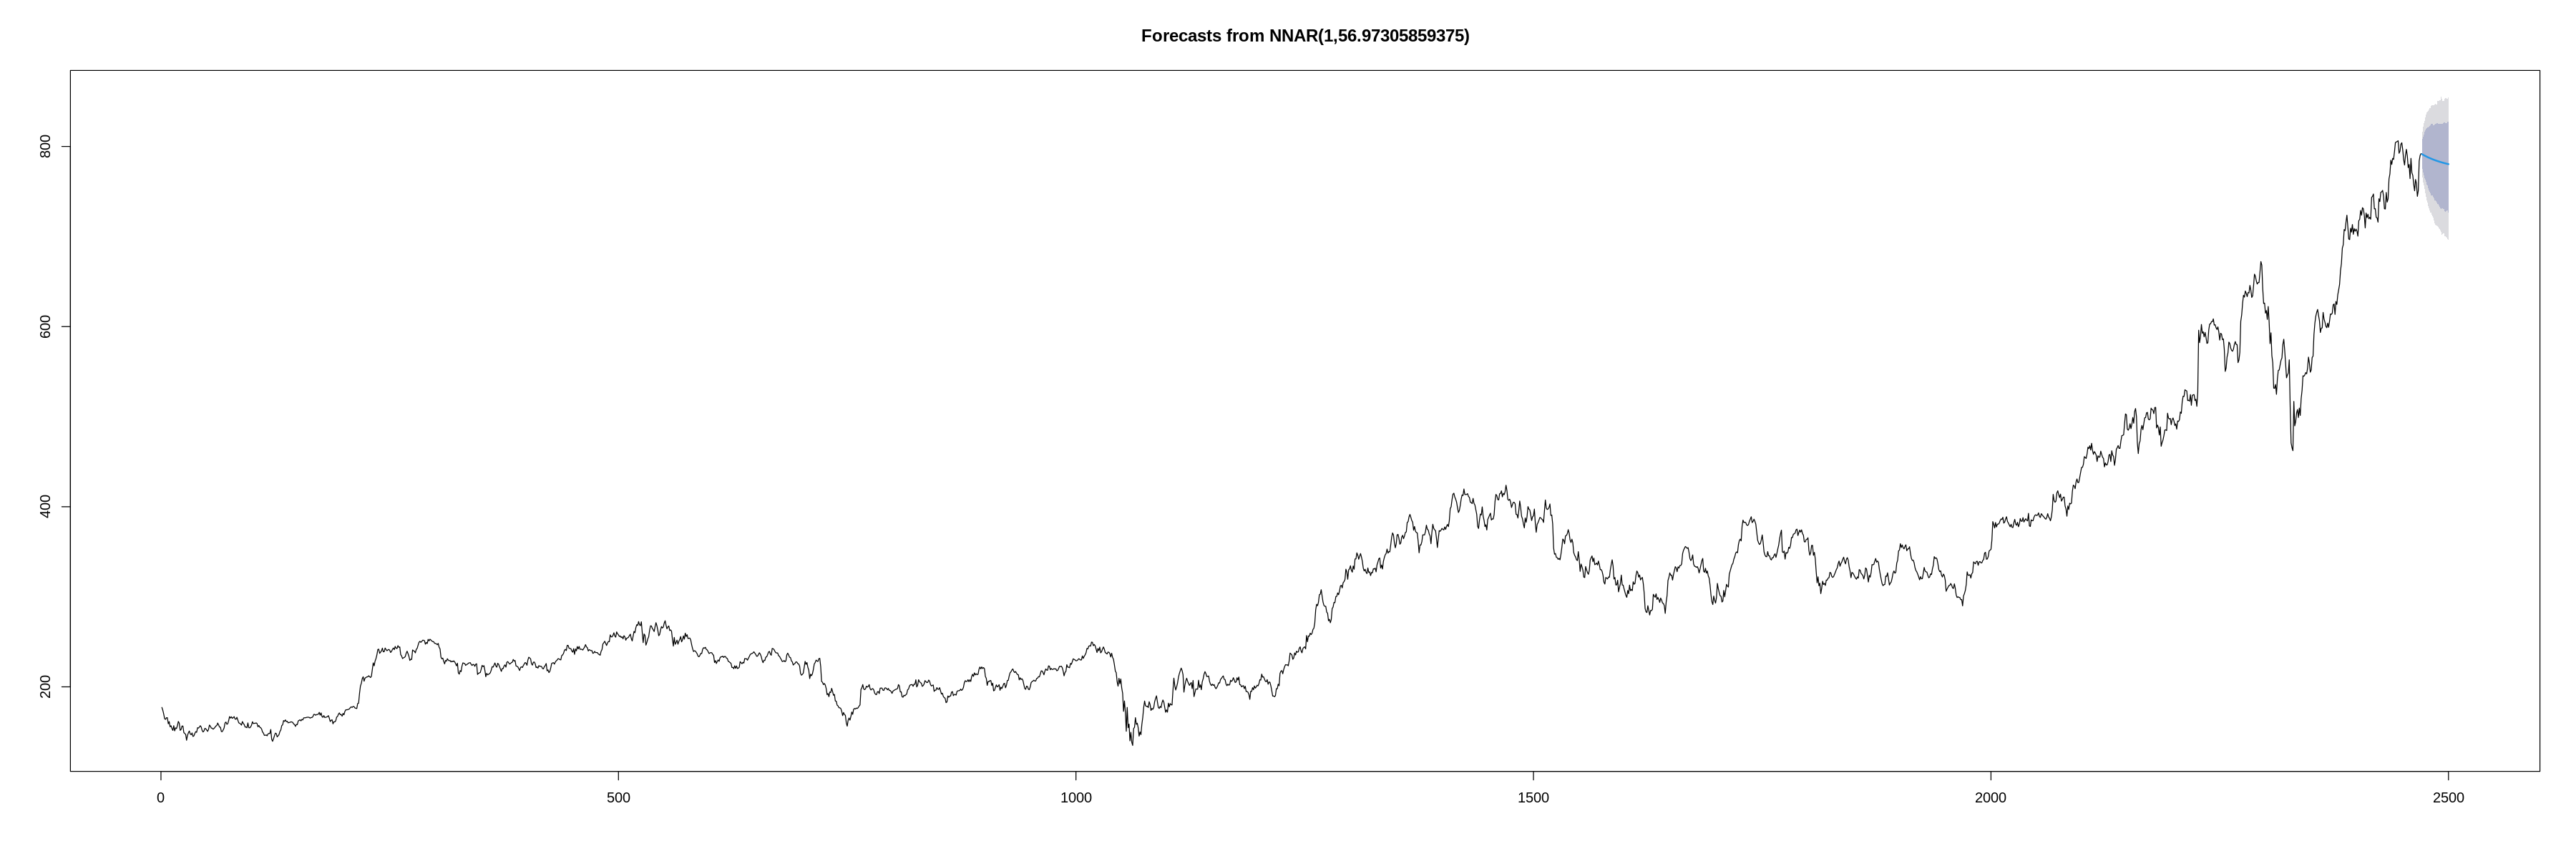

In [ ]:
dnn_forecast <- forecast(dnn_pred, h= 30, PI = TRUE)
options(repr.plot.width = 30, repr.plot.height = 10)
plot(dnn_forecast)

In [ ]:
gs_close_prices <- Cl(gsachs)

gs_ts <- ts(gs_close_prices, frequency = 252)
gs_ts_subset <- window(gs_ts,
                       start = time(gs_ts)[length(gs_ts) - 252*5],
                       end = time(gs_ts)[length(gs_ts)]
                       )

### **SARIMA FORECASTING**

In [ ]:
sarima_model <- auto.arima(
gs_ts_subset,

trace = TRUE,
max.order = 10,
max.p = 5, max.q = 5,
max.P = 2, max.Q = 2,
D = 1
)

print(sarima_model)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2)(1,1,1)[252]                    : Inf
 ARIMA(0,1,0)(0,1,0)[252]                    : 6297.046
 ARIMA(1,1,0)(1,1,0)[252]                    : Inf
 ARIMA(0,1,1)(0,1,1)[252]                    : Inf
 ARIMA(0,1,0)(1,1,0)[252]                    : Inf
 ARIMA(0,1,0)(0,1,1)[252]                    : Inf
 ARIMA(0,1,0)(1,1,1)[252]                    : Inf
 ARIMA(1,1,0)(0,1,0)[252]                    : 6297.47
 ARIMA(0,1,1)(0,1,0)[252]                    : 6296.714
 ARIMA(0,1,1)(1,1,0)[252]                    : Inf
 ARIMA(0,1,1)(1,1,1)[252]                    : Inf
 ARIMA(1,1,1)(0,1,0)[252]                    : 6299.466
 ARIMA(0,1,2)(0,1,0)[252]                    : 6298.506
 ARIMA(1,1,2)(0,1,0)[252]                    : 6300.475

 Now re-fitting the best model(s) without approximations...

 ARIMA(0,1,1)(0,1,0)[252]                    : 7445.218

 Best model: ARIMA(0,1,1)(0,1,0)[252]                    

Series: gs_ts_subs

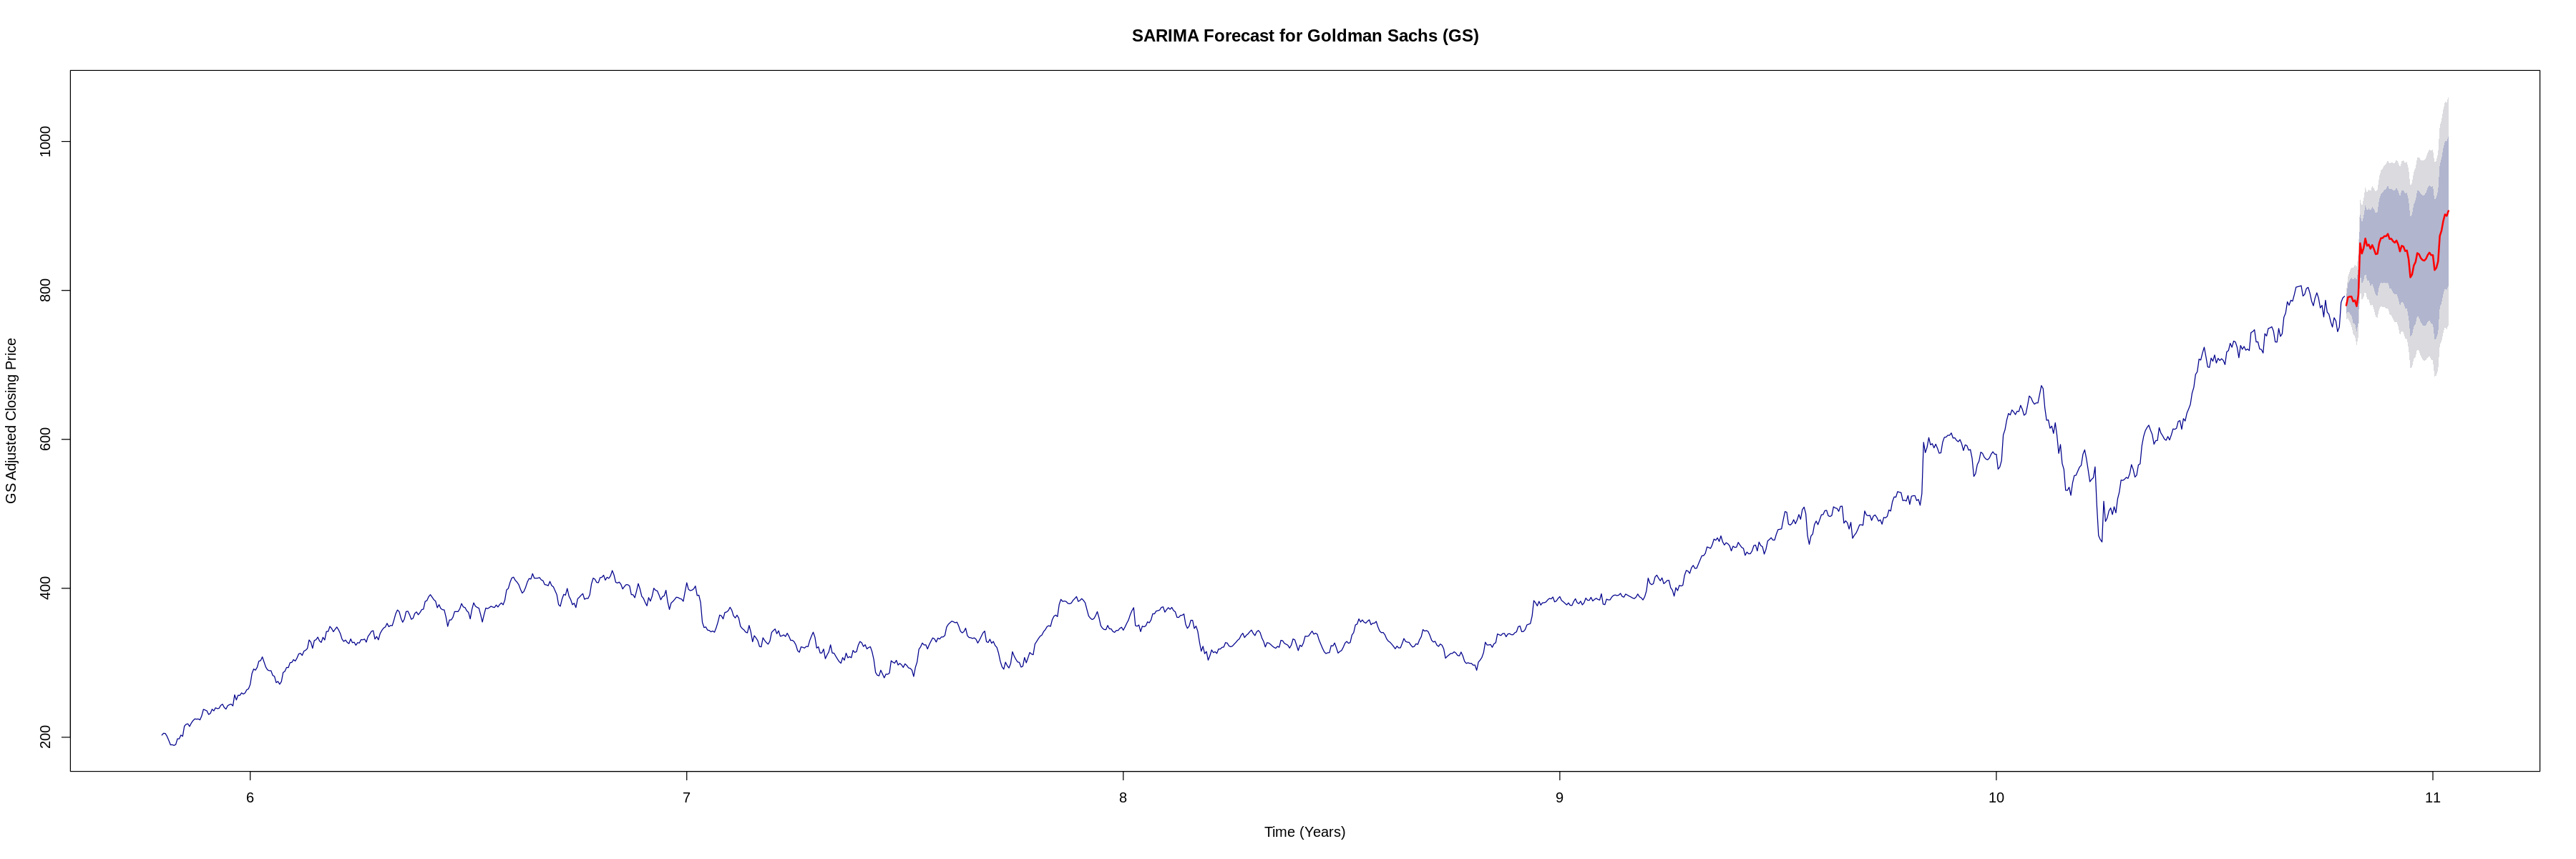

In [ ]:
sarima_forecast <- forecast(sarima_model, h = 60)

plot(sarima_forecast,
xlab = "Time (Years)",
ylab = "GS Adjusted Closing Price",
main = "SARIMA Forecast for Goldman Sachs (GS)",
col = "darkblue",
fcol = "red" # Color for the forecast mean line
)


## **Exponential Smoothing**

Warning message in ets(gs_ts_subset):
“I can't handle data with frequency greater than 24. Seasonality will be ignored. Try stlf() if you need seasonal forecasts.”


ETS(M,A,N) 

Call:
ets(y = gs_ts_subset)

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.004 

  Initial states:
    l = 206.2194 
    b = 1.1566 

  sigma:  0.0174

     AIC     AICc      BIC 
13891.48 13891.53 13917.18 


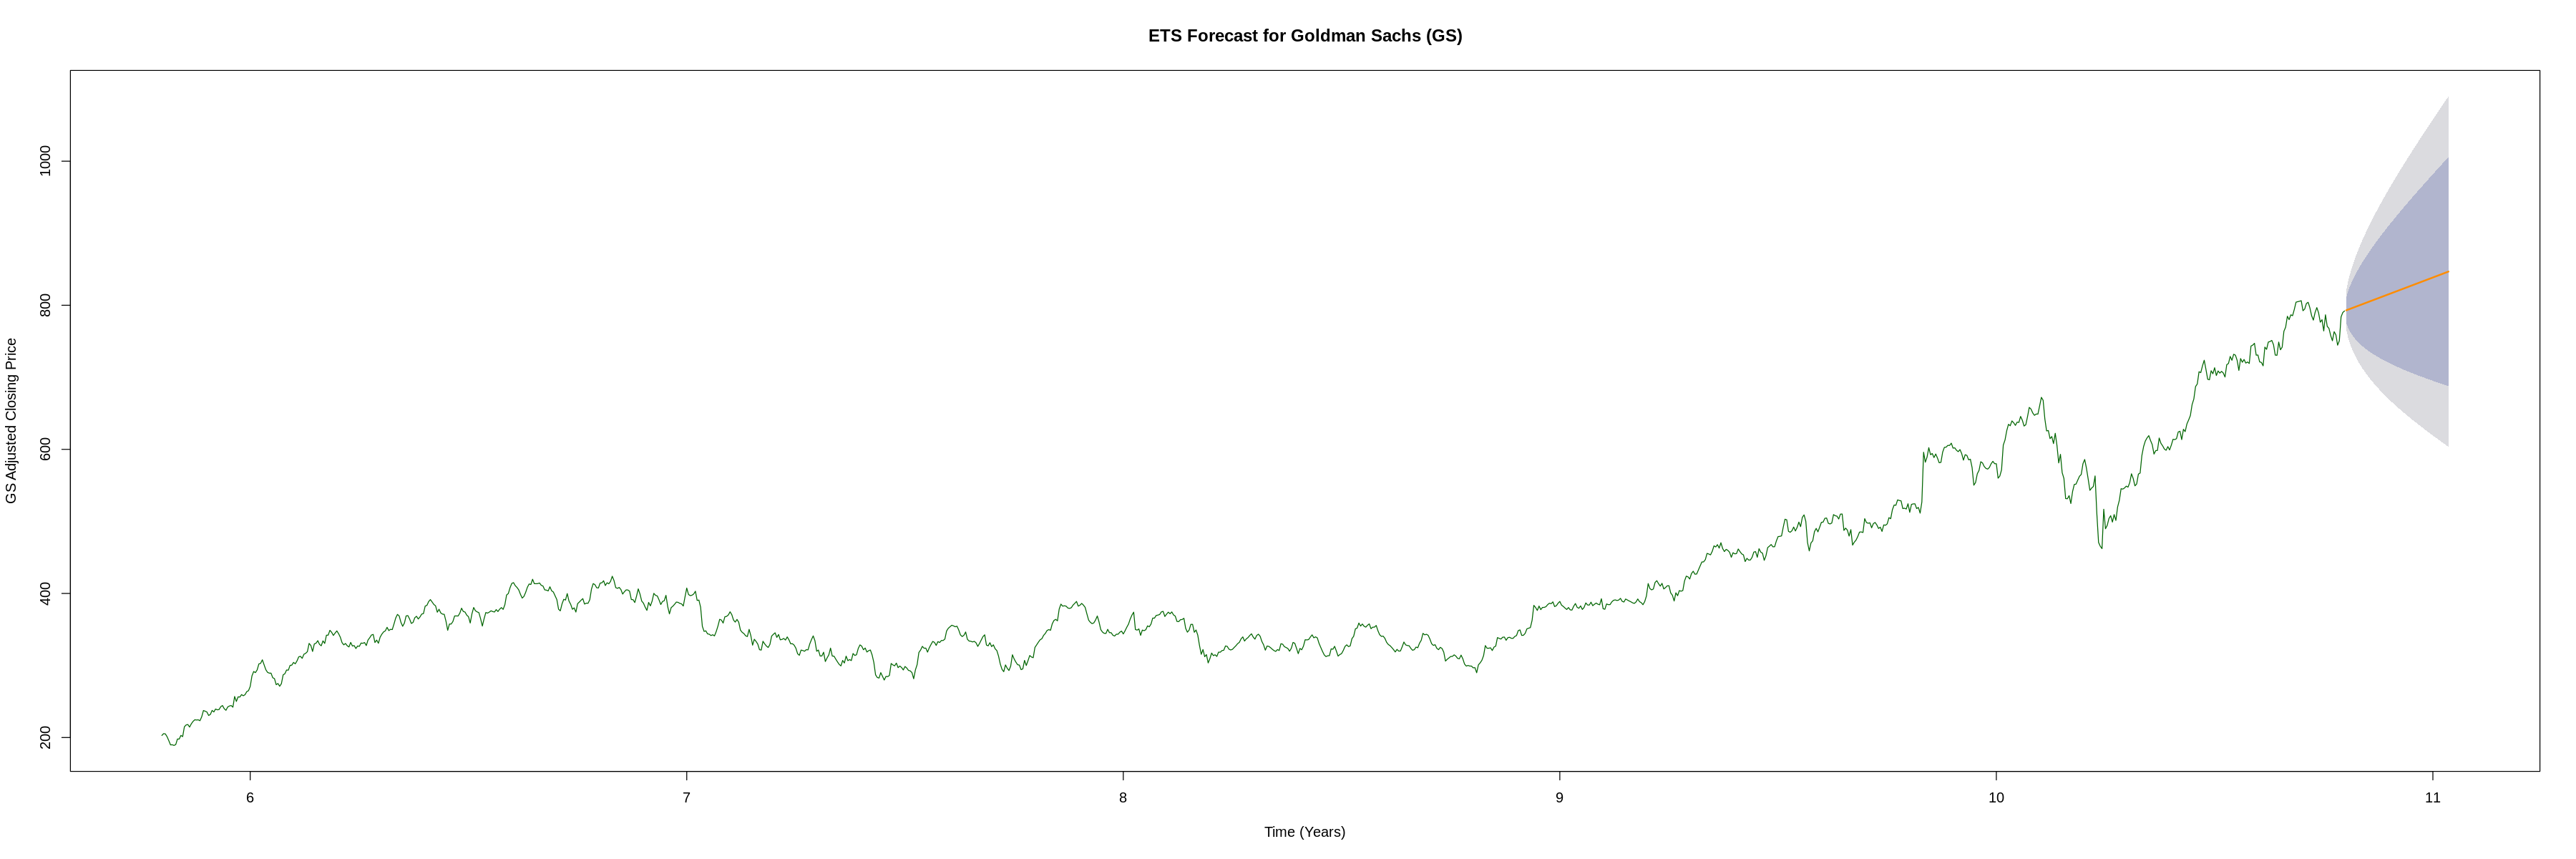

In [ ]:
ets_model <- ets(gs_ts_subset)
print(ets_model)

ets_forecast <- forecast(ets_model, h = 60)
plot(ets_forecast,
     xlab = "Time (Years)",
     ylab = "GS Adjusted Closing Price",
     main = "ETS Forecast for Goldman Sachs (GS)",
     col = "darkgreen",
     fcol = "darkorange" # Color for the forecast mean line
)


In [ ]:
install.packages("prophet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘abind’, ‘tensorA’, ‘distributional’, ‘checkmate’, ‘matrixStats’, ‘posterior’, ‘inline’, ‘gridExtra’, ‘loo’, ‘QuickJSR’, ‘dygraphs’, ‘extraDistr’, ‘RcppParallel’, ‘rstan’, ‘rstantools’, ‘StanHeaders’, ‘BH’, ‘RcppEigen’




In [ ]:
install.packages("quantmod")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("tseries")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
library(quantmod)
library(tseries)
library(forecast)
library(xts)
library(dplyr)
library(prophet)
library(randomForest)
library(caret)

FORECAST_HORIZON <- 60
TEST_PERIOD <- 252

start_date <- as.Date(Sys.Date()) - 365 * 5 - TEST_PERIOD

getSymbols("GS", from = start_date)
gs_close_prices <- Cl(GS)

gs_ts_full <- ts(as.numeric(gs_close_prices), frequency = 252)

gs_ts_train <- head(gs_ts_full, -TEST_PERIOD)
gs_test_actual <- tail(gs_ts_full, TEST_PERIOD)




Loading required package: Rcpp

Loading required package: rlang


Attaching package: ‘rlang’


The following objects are masked from ‘package:purrr’:

    %@%, flatten, flatten_chr, flatten_dbl, flatten_int, flatten_lgl,
    flatten_raw, invoke, splice


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




[1] "GS"

In [ ]:
gs_df_full <- gs_close_prices %>%
  data.frame(y = as.numeric(.), ds = index(.)) %>%
  select(ds, y)

create_features <- function(data, lags = 5) {
  for (i in 1:lags) {
    data <- data %>% mutate(!!paste0("Lag_", i) := lag(y, i))
  }
  return(data)
}

gs_df_features <- create_features(gs_df_full, lags = 5) %>% na.omit()

rf_train_set <- head(gs_df_features, -TEST_PERIOD)
rf_test_set <- tail(gs_df_features, TEST_PERIOD)

rf_test_actual <- rf_test_set$y
rf_test_predictors <- rf_test_set %>% select(-ds, -y)


In [ ]:

sarima_model <- auto.arima(
  gs_ts_train,
  trace = FALSE,
  stepwise = TRUE,
  max.order = 10,
  max.p = 5, max.q = 5,
  max.P = 2, max.Q = 2,
  D = 1
)

sarima_test_forecast <- forecast(sarima_model, h = TEST_PERIOD)

sarima_accuracy <- accuracy(sarima_test_forecast, gs_test_actual)
print("SARIMA Accuracy on Test Set:")
print(sarima_accuracy)



[1] "SARIMA Accuracy on Test Set:"
                      ME      RMSE       MAE         MPE     MAPE       MASE
Training set   0.1216196  7.201014  4.902326  0.01511649 1.356384 0.05716207
Test set     -11.1119428 58.872502 47.233471 -2.70647993 7.819965 0.55075142
                      ACF1 Theil's U
Training set -0.0002938886        NA
Test set      0.9709812373  4.856585


In [ ]:
ets_model <- ets(gs_ts_train)

ets_test_forecast <- forecast(ets_model, h = TEST_PERIOD)

ets_accuracy <- accuracy(ets_test_forecast, gs_test_actual)
print("ETS Accuracy on Test Set:")
print(ets_accuracy)


Warning message in ets(gs_ts_train):
“I can't handle data with frequency greater than 24. Seasonality will be ignored. Try stlf() if you need seasonal forecasts.”


[1] "ETS Accuracy on Test Set:"
                      ME       RMSE        MAE         MPE      MAPE       MASE
Training set   0.2491074   5.927891   4.433863  0.04762612  1.432892 0.05169971
Test set     116.1495038 145.387872 119.354864 16.60802429 17.267127 1.39170084
                   ACF1 Theil's U
Training set 0.01661173        NA
Test set     0.97995372  9.530775


In [ ]:
rf_model <- randomForest(y ~ .,
                         data = rf_train_set %>% select(-ds),
                         ntree = 500,
                         importance = TRUE)

rf_test_prediction <- predict(rf_model, newdata = rf_test_predictors)

rf_forecast_object <- structure(list(mean = rf_test_prediction), class = "forecast")

# Calculate accuracy
rf_accuracy <- accuracy(rf_forecast_object, rf_test_actual)
print("Random Forest Accuracy on Test Set:")
print(rf_accuracy)

Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”


[1] "Random Forest Accuracy on Test Set:"
                   ME     RMSE      MAE      MPE     MAPE
Training set      NaN      NaN      NaN      NaN      NaN
Test set     120.2734 147.4514 121.4113 17.32378 17.56115


In [ ]:
prophet_df_full <- gs_close_prices %>%
  data.frame(y = as.numeric(.), ds = index(.)) %>%
  select(ds, y)

prophet_df_train <- head(prophet_df_full, -TEST_PERIOD)

prophet_model <- prophet(
  prophet_df_train,
  daily.seasonality = FALSE,
  weekly.seasonality = TRUE,
  yearly.seasonality = TRUE
)

prophet_test_dates <- make_future_dataframe(prophet_model, periods = TEST_PERIOD)
prophet_test_dates <- tail(prophet_test_dates, TEST_PERIOD)

prophet_test_prediction <- predict(prophet_model, prophet_test_dates)$yhat
prophet_forecast_object <- structure(list(mean = prophet_test_prediction), class = "forecast")

prophet_accuracy <- accuracy(prophet_forecast_object, gs_test_actual)
print("Prophet Accuracy on Test Set:")
print(prophet_accuracy)


Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”


[1] "Prophet Accuracy on Test Set:"
                   ME     RMSE      MAE      MPE     MAPE      ACF1 Theil's U
Training set      NaN      NaN      NaN      NaN      NaN        NA        NA
Test set     26.08551 69.53347 57.97156 2.877587 8.907312 0.9474317  5.088423


In [ ]:
nnar_model <- nnetar(gs_ts_train, size = 10)
nnar_test_forecast <- forecast(nnar_model, h = TEST_PERIOD)

nnar_accuracy <- accuracy(nnar_test_forecast, gs_test_actual)
print("NNAR Accuracy on Test Set:")
print(nnar_accuracy)

[1] "NNAR Accuracy on Test Set:"
                        ME       RMSE        MAE        MPE      MAPE
Training set  -0.001024791   5.760468   4.392161 -0.0252569  1.205623
Test set     197.673961615 224.871536 197.830779 29.2248799 29.255453
                   MASE      ACF1 Theil's U
Training set 0.05121345 0.0761129        NA
Test set     2.30674522 0.9805888  15.14172


[1] "--- Forecast Accuracy Comparison (Lower is Better) ---"
         Model      RMSE       MAE
1       SARIMA  58.87250  47.23347
4      Prophet  69.53347  57.97156
2          ETS 145.38787 119.35486
3 RandomForest 147.45142 121.41133
5         NNAR 224.87154 197.83078


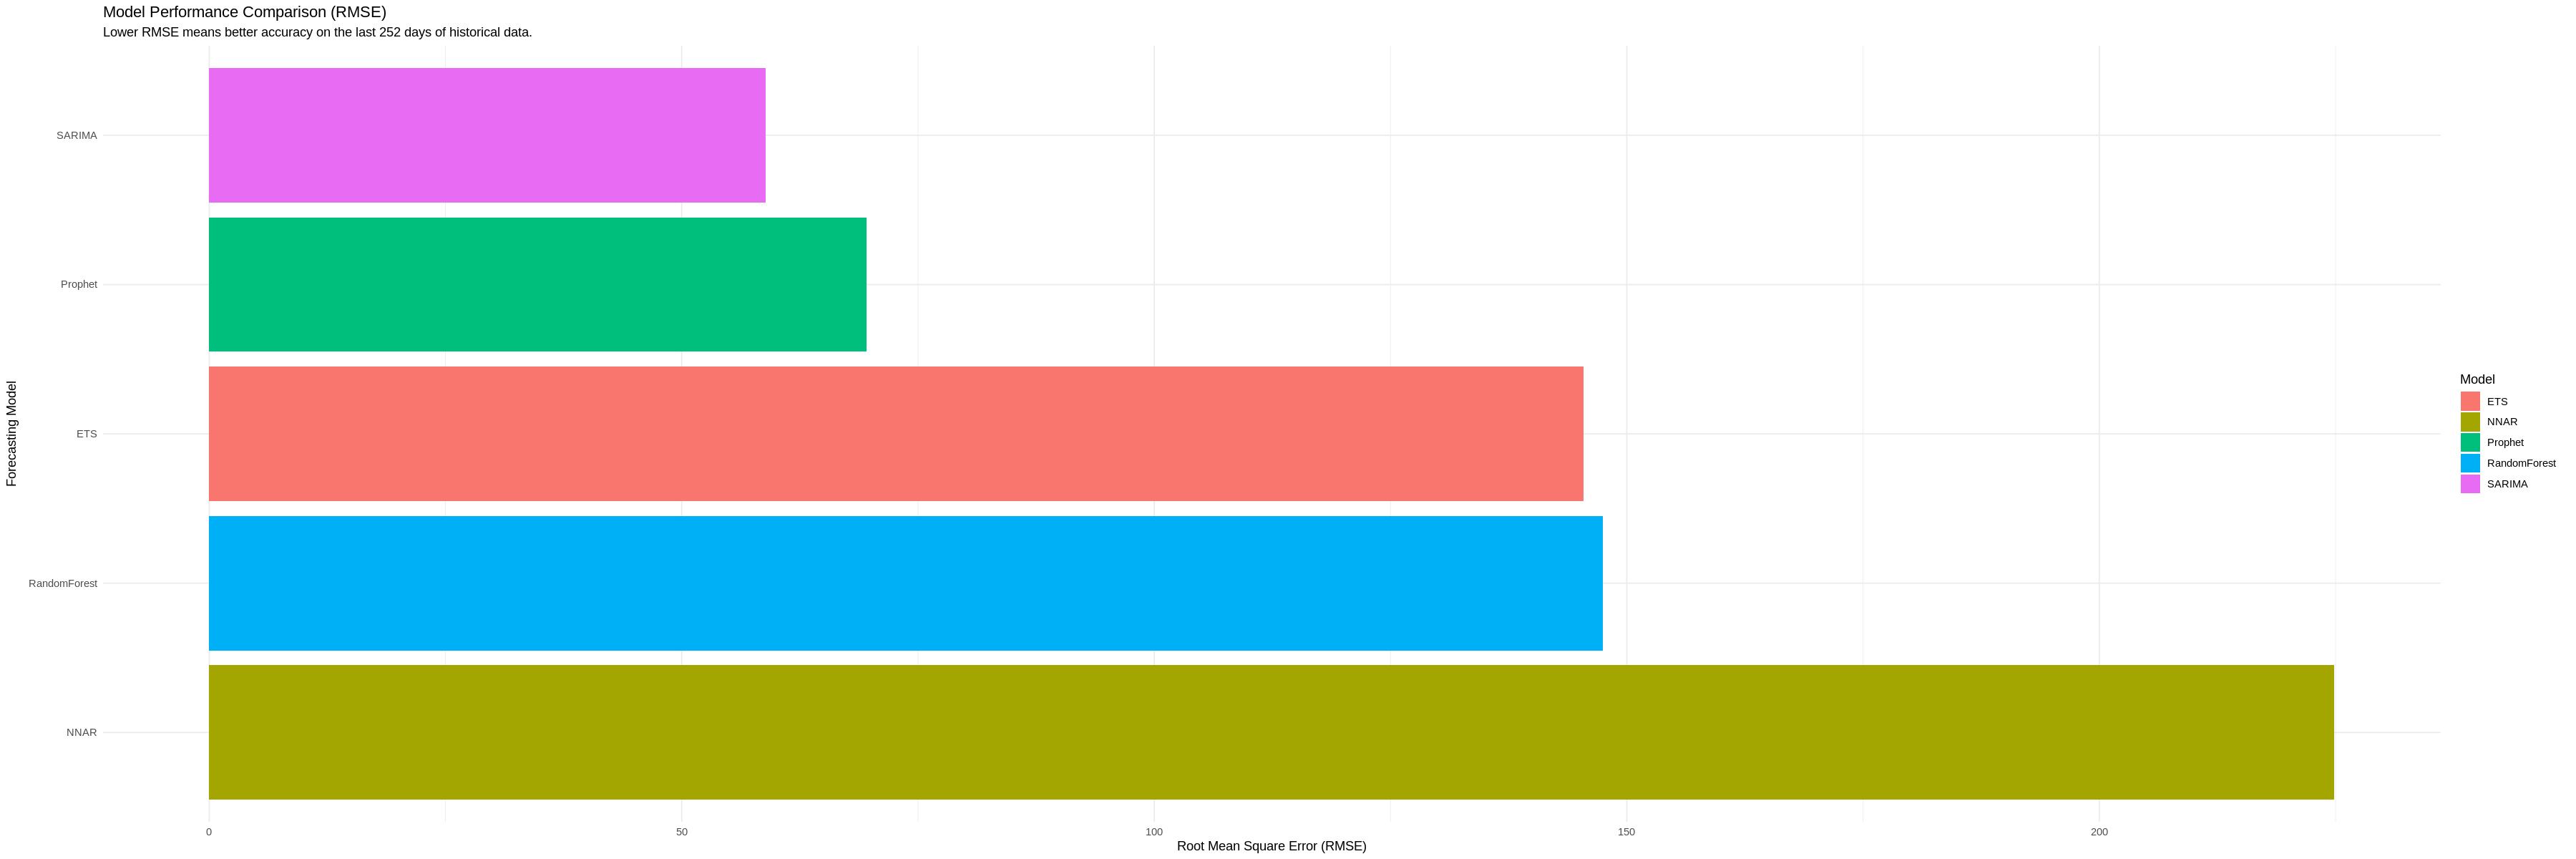

In [ ]:

metrics_df <- data.frame(
  Model = c("SARIMA", "ETS", "RandomForest", "Prophet", "NNAR"),
  RMSE = c(
    sarima_accuracy["Test set", "RMSE"],
    ets_accuracy["Test set", "RMSE"],
    rf_accuracy["Test set", "RMSE"],
    prophet_accuracy["Test set", "RMSE"],
    nnar_accuracy["Test set", "RMSE"]
  ),
  MAE = c(
    sarima_accuracy["Test set", "MAE"],
    ets_accuracy["Test set", "MAE"],
    rf_accuracy["Test set", "MAE"],
    prophet_accuracy["Test set", "MAE"],
    nnar_accuracy["Test set", "MAE"]
  ),
  stringsAsFactors = FALSE
)

metrics_df_sorted <- metrics_df[order(metrics_df$RMSE), ]

print("--- Forecast Accuracy Comparison (Lower is Better) ---")
print(metrics_df_sorted)

library(ggplot2)
print(ggplot(metrics_df_sorted, aes(x = reorder(Model, -RMSE), y = RMSE, fill = Model)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Model Performance Comparison (RMSE)",
       subtitle = paste("Lower RMSE means better accuracy on the last", TEST_PERIOD, "days of historical data."),
       x = "Forecasting Model",
       y = "Root Mean Square Error (RMSE)") +
  theme_minimal() +
  coord_flip()
)


In [ ]:
get_direction <- function(predictions) {
  # Compares price today vs. price yesterday. > 0 means UP, <= 0 means DOWN/Flat.
  return(factor(sign(diff(predictions)) > 0, levels = c(FALSE, TRUE), labels = c("DOWN", "UP")))
}

# 1. Calculate Actual Direction for the Test Period (using known prices)
actual_direction <- get_direction(gs_test_actual)

# 2. Extract Forecasted Prices for the Test Period
all_predictions <- data.frame(
  SARIMA = sarima_test_forecast$mean,
  ETS = ets_test_forecast$mean,
  Prophet = prophet_forecast_object$mean,
  NNAR = nnar_test_forecast$mean,
  RandomForest = rf_test_prediction
)

# 3. Calculate Predicted Direction for all models
confusion_matrices <- list()
directional_accuracy <- data.frame(Model = character(), Accuracy = numeric(), stringsAsFactors = FALSE)

for (model_name in colnames(all_predictions)) {
  predicted_prices <- all_predictions[[model_name]]
  predicted_direction <- get_direction(predicted_prices)

  # Create Confusion Matrix
  cm <- confusionMatrix(data = predicted_direction,
                        reference = actual_direction)
  confusion_matrices[[model_name]] <- cm

  # Store Overall Accuracy
  directional_accuracy <- directional_accuracy %>%
    add_row(Model = model_name, Accuracy = cm$overall['Accuracy'])
}

print("--- Directional Accuracy Comparison (Higher is Better) ---")
directional_accuracy_sorted <- directional_accuracy[order(-directional_accuracy$Accuracy), ]
print(directional_accuracy_sorted)

print("\n--- Confusion Matrices (Summary) ---")
for (model_name in names(confusion_matrices)) {
  cm <- confusion_matrices[[model_name]]
  cat("\nModel:", model_name, "\n")
  print(cm$table)
  cat("  Accuracy:", round(cm$overall['Accuracy'], 4),
      "| Sensitivity (True Up):", round(cm$byClass['Sensitivity'], 4),
      "| Specificity (True Down):", round(cm$byClass['Specificity'], 4),
      "\n")
}


[1] "--- Directional Accuracy Comparison (Higher is Better) ---"
         Model  Accuracy
1       SARIMA 0.5219124
3      Prophet 0.4940239
4         NNAR 0.4820717
5 RandomForest 0.4661355
2          ETS 0.4422311
[1] "\n--- Confusion Matrices (Summary) ---"

Model: SARIMA 
          Reference
Prediction DOWN UP
      DOWN   49 58
      UP     62 82
  Accuracy: 0.5219 | Sensitivity (True Up): 0.4414 | Specificity (True Down): 0.5857 

Model: ETS 
          Reference
Prediction DOWN  UP
      DOWN  111 140
      UP      0   0
  Accuracy: 0.4422 | Sensitivity (True Up): 1 | Specificity (True Down): 0 

Model: Prophet 
          Reference
Prediction DOWN UP
      DOWN   33 49
      UP     78 91
  Accuracy: 0.494 | Sensitivity (True Up): 0.2973 | Specificity (True Down): 0.65 

Model: NNAR 
          Reference
Prediction DOWN UP
      DOWN   79 98
      UP     32 42
  Accuracy: 0.4821 | Sensitivity (True Up): 0.7117 | Specificity (True Down): 0.3 

Model: RandomForest 
          Reference